In [1]:
import os
import pandas as pd
import nltk
import re
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.externals import joblib


import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import string 
def remove_punctuations(text):
    return text.translate(None,string.punctuation)

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer("english")

In [4]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    tokens = [w for w in tokens if not w in stopwords]
   # tokens = [w for w in tokens if w.isalpha()] 
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)       
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    tokens = [w for w in tokens if not w in stopwords] 
    #tokens = [w for w in tokens if w.isalpha()]  
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token) 
    return filtered_tokens

def calculate_WSS(points, kmax):
  sse = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(points.shape[0]):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse



In [5]:
os.chdir(r"C:\Users\SpirosAvgoustatos\Desktop\DATATHON DATASET")
occupations=pd.read_csv("o.csv")
skills=pd.read_csv("s.csv")
relations=pd.read_csv("osr.csv")

In [6]:
occupations=occupations[['conceptUri','preferredLabel','altLabels','scopeNote','description']]
skills=skills[['conceptUri','skillType','reuseLevel','preferredLabel','altLabels','description']]

occupations=occupations.rename(columns={"conceptUri": "Occ_Uri", "preferredLabel": "Occ_title", "altLabels": "Alt_Occ_title", "scopeNote": "Occ_scope", "description": "Occ_description"})
skills=skills.rename(columns={"conceptUri": "skill_Uri", "skillType": "skill_type","reuseLevel": "skill_reuse_level", "preferredLabel": "skill_title","altLabels": "alt_skill_title", "description": "skill_description"})
relations=relations.rename(columns={"occupationUri": "Occ_Uri","relationType": "relationType","skillType": "skillType","skillUri": "skill_Uri"})

temp=occupations.merge(relations, left_on='Occ_Uri', right_on='Occ_Uri')
occ_skills=temp.merge(skills, left_on='skill_Uri', right_on='skill_Uri')

occ_skills["skill_title"]=occ_skills["skill_title"].fillna('')
occ_skills["skill_title"]=occ_skills["skill_title"].replace(r'\n',' ', regex=True) 
occ_skills["skill_title2"]=occ_skills["skill_title"].str.replace('[^\w\s]','').str.lower()
occ_skills["skill_title"]=occ_skills["skill_title2"]


occ_skills["alt_skill_title"]=occ_skills["alt_skill_title"].fillna('')
occ_skills["alt_skill_title"]=occ_skills["alt_skill_title"].replace(r'\n',' ', regex=True) 
occ_skills["alt_skill_title2"]=occ_skills["alt_skill_title"].str.replace('[^\w\s]','').str.lower()
occ_skills["alt_skill_title"]=occ_skills["alt_skill_title2"]

occ_skills["Alt_Occ_title"]=occ_skills["Alt_Occ_title"].fillna('')
occ_skills["Alt_Occ_title"]=occ_skills["Alt_Occ_title"].replace(r'\n',' ', regex=True) 


occ_skills["Occ_description"]=occ_skills["Occ_description"].fillna('')
occ_skills["Occ_description"]=occ_skills["Occ_description"].replace(r'\n',' ', regex=True) 
occ_skills["Occ_description2"]=occ_skills["Occ_description"].str.replace('[^\w\s]','').str.lower()
occ_skills["Occ_description"]=occ_skills["Occ_description2"]

occ_skills["skill_description"]=occ_skills["skill_description"].fillna('')
occ_skills["skill_description"]=occ_skills["skill_description"].replace(r'\n',' ', regex=True) 
occ_skills["skill_description2"]=occ_skills["skill_description"].str.replace('[^\w\s]','').str.lower()
occ_skills["skill_description"]=occ_skills["skill_description2"]




by_occ=occ_skills.groupby(['Occ_title'], as_index = False).agg(lambda x: ','.join(x.unique())) 


In [7]:
by_occ

,Occ_title,Occ_Uri,Alt_Occ_title,Occ_description,relationType,skillType,skill_Uri,skill_type,skill_reuse_level,skill_title,alt_skill_title,skill_description,skill_title2,alt_skill_title2,Occ_description2,skill_description2
0,3D animator,http://data.europa.eu/esco/occupation/52df9d56...,3D animators computer-generated imagery animat...,3d animators are in charge of animating 3d mod...,"optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/0e1fe34b-f4e7...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","manage schedule of tasks,confer on artwork,use...",schedule tasks organise tasks organize tasks t...,maintain an overview of all the incoming tasks...,"manage schedule of tasks,confer on artwork,use...",schedule tasks organise tasks organize tasks t...,3d animators are in charge of animating 3d mod...,maintain an overview of all the incoming tasks...
1,3D modeller,http://data.europa.eu/esco/occupation/bab5fa79...,3D modellers 3D texturing artist CGI modeller ...,3d modellers design 3d models of objects virtu...,"optional,essential","skill/competence,knowledge",http://data.europa.eu/esco/skill/744442ac-c157...,"skill/competence,knowledge","cross-sector,sector-specific,transversal,occup...","perform ict troubleshooting,geographic informa...",undertake ict troubleshooting performing ict ...,identify problems with servers desktops printe...,"perform ict troubleshooting,geographic informa...",undertake ict troubleshooting performing ict ...,3d modellers design 3d models of objects virtu...,identify problems with servers desktops printe...
2,3D printing technician,http://data.europa.eu/esco/occupation/4cf7be91...,3D printing operator printing machine technici...,3d printing technicians assist in the designin...,"optional,essential","knowledge,skill/competence",http://data.europa.eu/esco/skill/59ea80e1-463a...,"knowledge,skill/competence","cross-sector,sector-specific","technical drawings,use technical drawing softw...",mechanical drawings specialised drawings techn...,drawing software and the various symbols persp...,"technical drawings,use technical drawing softw...",mechanical drawings specialised drawings techn...,3d printing technicians assist in the designin...,drawing software and the various symbols persp...
3,ATM repair technician,http://data.europa.eu/esco/occupation/490d0c6f...,automated teller machine repair technician ATM...,atm repair technicians install diagnose mainta...,"essential,optional","skill/competence,knowledge",http://data.europa.eu/esco/skill/334e3e49-fb02...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","troubleshoot,perform test run,electronics,inst...",troubleshooting identify problems troubleshoot...,identify operating problems decide what to do ...,"troubleshoot,perform test run,electronics,inst...",troubleshooting identify problems troubleshoot...,atm repair technicians install diagnose mainta...,identify operating problems decide what to do ...
4,Freinet school teacher,http://data.europa.eu/esco/occupation/8befd482...,Freinet school teaching practitioner Freinet p...,freinet school teachers educate students using...,"essential,optional","skill/competence,knowledge",http://data.europa.eu/esco/skill/07090471-265a...,"skill/competence,knowledge","cross-sector,sector-specific,occupation-specific","manage childrens problems,guarantee students s...",manage a childs problems manage problems of ch...,promote the prevention early detection and man...,"manage childrens problems,guarantee students s...",manage a childs problems manage problems of ch...,freinet school teachers educate students using...,promote the prevention early detection and man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,zoo educator,http://data.europa.eu/esco/occupation/7c5e4ca1...,education instructor learning officer conserva...,zoo educators teach visitors about the animals...,"essential,optional","skill/competence,k

In [8]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in by_occ["skill_title"]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
    

In [9]:
totalvocab_stemmed2 = []
totalvocab_tokenized2 = []
for i in by_occ["alt_skill_title"]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed2.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized2.extend(allwords_tokenized)

In [10]:
totalvocab_stemmed3 = []
totalvocab_tokenized3 = []
for i in by_occ["skill_description"]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed3.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized3.extend(allwords_tokenized)

In [11]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame of skill_title')


there are 345581 items in vocab_frame of skill_title


In [12]:
vocab_frame2 = pd.DataFrame({'words': totalvocab_tokenized2}, index = totalvocab_stemmed2)
print('there are ' + str(vocab_frame2.shape[0]) + ' items in vocab_frame of alt_skill_title')

there are 2295910 items in vocab_frame of alt_skill_title


In [13]:
vocab_frame3 = pd.DataFrame({'words': totalvocab_tokenized3}, index = totalvocab_stemmed3)
print('there are ' + str(vocab_frame3.shape[0]) + ' items in vocab_frame of skill descriptions')

there are 1610294 items in vocab_frame of skill descriptions


In [14]:
print(vocab_frame)

              words
manag        manage
schedul    schedule
task          tasks
confer       confer
artwork     artwork
...             ...
welfar      welfare
manag    management
anim         animal
food           food
product    products

[345581 rows x 1 columns]


In [15]:
print(vocab_frame2)

                words
schedul      schedule
task            tasks
organis      organise
task            tasks
organ        organize
...               ...
foodstuff  foodstuffs
anim           animal
origin         origin
anim           animal
feedstuff  feedstuffs

[2295910 rows x 1 columns]


In [16]:
print(vocab_frame3)

                words
maintain     maintain
overview     overview
incom        incoming
task            tasks
order           order
...               ...
intend       intended
human           human
andor           andor
anim           animal
consumpt  consumption

[1610294 rows x 1 columns]


In [17]:
from nltk.tokenize import word_tokenize

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=300000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8,min_df=0.05, max_features=300000,
                                  stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))


tfidf_vectorizer3 = TfidfVectorizer(max_df=0.8, max_features=300000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))


%time tfidf_matrix = tfidf_vectorizer.fit_transform(by_occ["skill_title"]) #fit the vectorizer to synopses
terms = tfidf_vectorizer.get_feature_names()
dist = 1 - cosine_similarity(tfidf_matrix)


%time tfidf_matrix2 = tfidf_vectorizer2.fit_transform(by_occ["alt_skill_title"]) #fit the vectorizer to synopses
terms2 = tfidf_vectorizer2.get_feature_names()
dist2 = 1 - cosine_similarity(tfidf_matrix2)

%time tfidf_matrix3 = tfidf_vectorizer3.fit_transform(by_occ["skill_description"]) #fit the vectorizer to synopses
terms3 = tfidf_vectorizer3.get_feature_names()
dist3 = 1 - cosine_similarity(tfidf_matrix3)


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 12.3 s


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 1min 13s


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 56.6 s


In [18]:
print(tfidf_matrix.shape)

(2942, 454)


In [19]:
print(tfidf_matrix2.shape)

(2942, 2569)


In [20]:
print(tfidf_matrix3.shape)

(2942, 2971)


In [21]:
print(terms)

['account', 'act', 'activ', 'adapt', 'adher', 'adher organis', 'adher organis guidelin', 'adjust', 'administ', 'administr', 'advic', 'advis', 'aid', 'analys', 'analysi', 'analyt', 'anim', 'appli', 'appli health', 'appli health safeti', 'appli health safeti standard', 'appli technic', 'appli technic communic', 'appli technic communic skill', 'appropri', 'appropri protect', 'appropri protect gear', 'area', 'arrang', 'artist', 'assembl', 'assess', 'assist', 'assur', 'attend', 'audit', 'autom', 'autom machin', 'avail', 'behaviour', 'beverag', 'blueprint', 'budget', 'build', 'build busi', 'build busi relationship', 'busi', 'busi relationship', 'cad', 'cad softwar', 'calcul', 'care', 'carri', 'chain', 'chang', 'channel', 'characterist', 'check', 'chemic', 'chemistri', 'clean', 'client', 'code', 'collabor', 'colleagu', 'collect', 'commerci', 'communic', 'communic channel', 'communic custom', 'communic skill', 'compani', 'compani polici', 'compli', 'complianc', 'complianc environment', 'compli

In [22]:
print(terms2)

['abid', 'abil', 'abreast', 'accept', 'accid', 'accord', 'account', 'accur', 'achiev', 'achiev deadlin', 'achiev deadlin complet', 'achiev deadlin complet deadlin', 'act', 'action', 'activ', 'activ carri', 'activ carri workrel', 'activ carri workrel report', 'activ ensur', 'activ listen', 'activ listen appli', 'activ listen appli activ', 'activ listen listen', 'activ listen listen attent', 'activ listen techniqu', 'activ listen techniqu activ', 'activ listen techniqu use', 'activ manag', 'activ overse', 'activ perform', 'activ produc', 'activ produc workrel', 'activ produc workrel report', 'activ supervis', 'activ use', 'adapt', 'address', 'adher', 'adher organis', 'adher organis guidelin', 'adher organis guidelin compli', 'adher organis guidelin obey', 'adher organis guidelin observ', 'adjust', 'administ', 'administ health', 'administ health safeti', 'administ health safeti standard', 'administ organis', 'administ technic', 'administ technic communic', 'administ technic communic skill

In [23]:
print(terms3)

['abil', 'abl', 'abl communic', 'abl communic foreign', 'abl communic foreign languag', 'abl listen', 'abl listen care', 'abl listen care need', 'abnorm', 'academ', 'accept', 'access', 'access desir', 'access desir product', 'access desir product servic', 'accessori', 'accid', 'accord custom', 'accord product', 'accord product servic', 'accord regul', 'accord specif', 'account', 'account follow', 'accur', 'accuraci', 'achiev', 'achiev goal', 'achiev goal maintain', 'achiev goal maintain effect', 'achiev lead', 'achiev lead group', 'achiev lead group peopl', 'achiev set', 'achiev set goal', 'achiev specif', 'achiev specif goal', 'acquir', 'acquir new', 'act', 'act accord', 'action', 'action actual', 'action actual oper', 'action actual oper condit', 'action displac', 'action displac forc', 'action displac forc physic', 'action evalu', 'action evalu perform', 'action evalu perform use', 'activ', 'activ aim', 'activ aim introduc', 'activ aim introduc work', 'activ compani', 'activ execut'

In [24]:
elbow=calculate_WSS(tfidf_matrix,30)
elbow2=calculate_WSS(tfidf_matrix2,30)
elbow3=calculate_WSS(tfidf_matrix3,30)


In [25]:
kmax=29


sil = []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tfidf_matrix)
  labels = kmeans.labels_
  sil.append(silhouette_score(tfidf_matrix, labels, metric = 'euclidean'))



sil2 = []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tfidf_matrix2)
  labels = kmeans.labels_
  sil2.append(silhouette_score(tfidf_matrix2, labels, metric = 'euclidean'))




sil3 = []
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tfidf_matrix3)
  labels = kmeans.labels_
  sil3.append(silhouette_score(tfidf_matrix3, labels, metric = 'euclidean'))



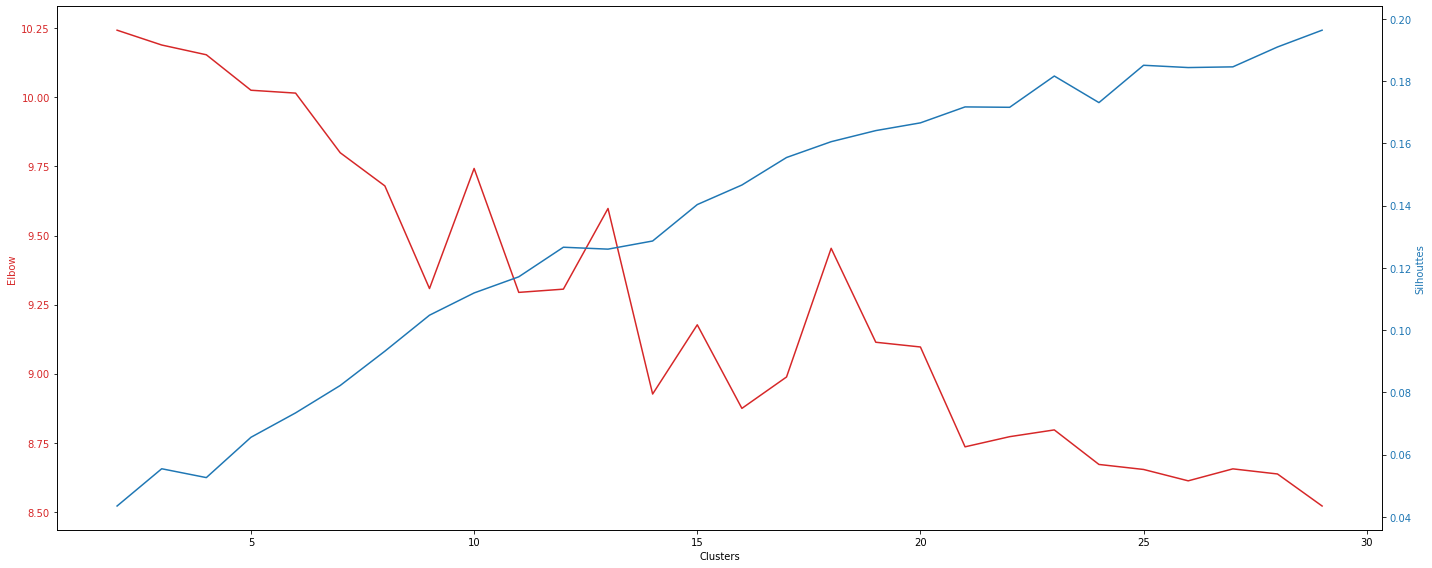

In [33]:
import numpy as np
# Create some mock data
t = range(2, 30)
data1 = elbow[:-1]
data2 = sil

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Elbow', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouttes', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rcParams["figure.figsize"] = (20,8)
plt.show()


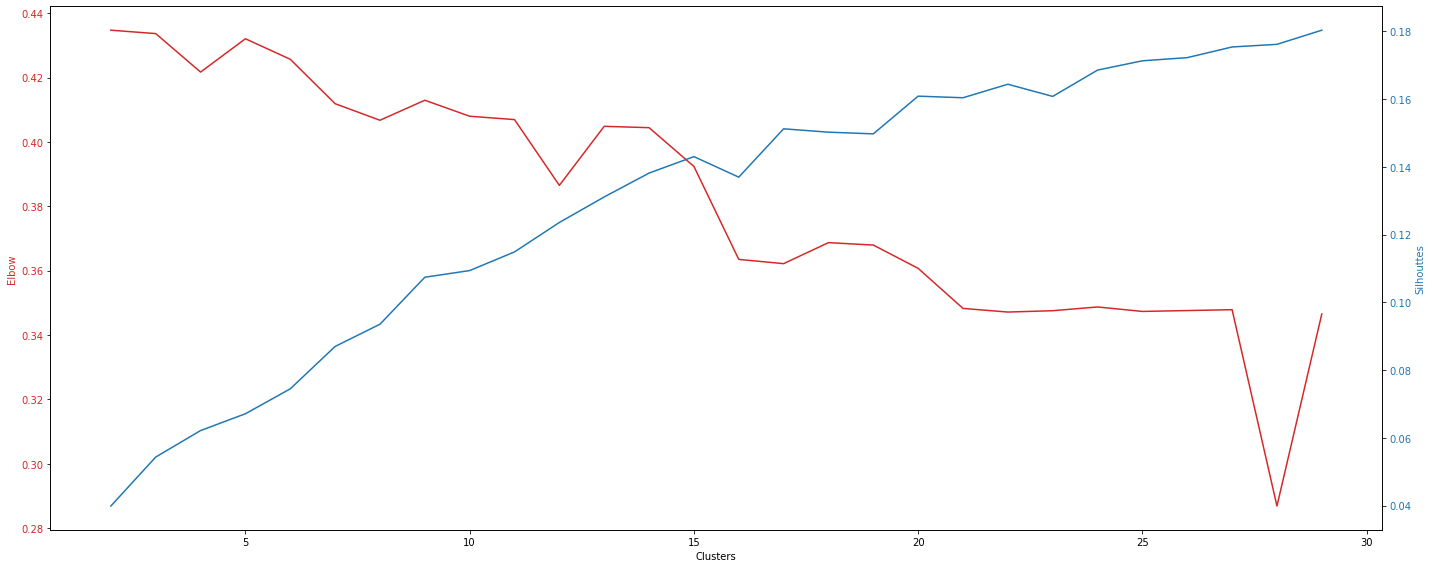

In [28]:
import numpy as np
# Create some mock data
t = range(2, 30)
data1 = elbow2[:-1]
data2 = sil2

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Elbow', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouttes', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rcParams["figure.figsize"] = (20,8)
plt.show()


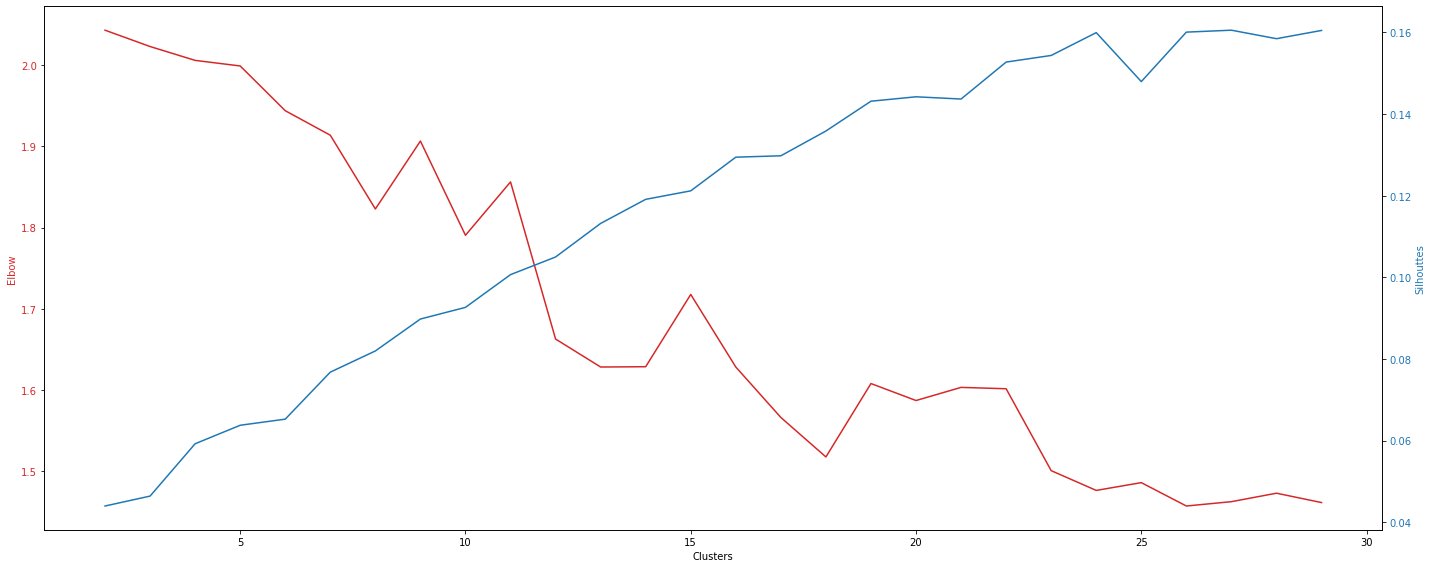

In [29]:
import numpy as np
# Create some mock data
t = range(2, 30)
data1 = elbow3[:-1]
data2 = sil3

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Elbow', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouttes', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [34]:
############# CHOSOSE CLUSTERS AFTER TESTS ##################

In [35]:
num_clusters = 13
num_clusters2 = 12
num_clusters3 = 15

In [36]:
############# CHOSOSE CLUSTERS AFTER TESTS ##################

In [37]:
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 50.1 s


In [38]:
km2 = KMeans(n_clusters=num_clusters2)

%time km2.fit(tfidf_matrix2)

clusters2 = km2.labels_.tolist()

Wall time: 3min 21s


In [39]:
km3 = KMeans(n_clusters=num_clusters3)

%time km3.fit(tfidf_matrix3)

clusters3 = km3.labels_.tolist()

Wall time: 4min 12s


In [40]:

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')
joblib.dump(km2,  'doc_cluster2.pkl')
joblib.dump(km3,  'doc_cluster3.pkl')

km = joblib.load('doc_cluster.pkl')
km2 = joblib.load('doc_cluster2.pkl')
km3 = joblib.load('doc_cluster3.pkl')


clusters = km.labels_.tolist()
clusters2 = km2.labels_.tolist()
clusters3 = km2.labels_.tolist()

In [41]:
by_occ["cluster_skill"]=clusters
by_occ["cluster_descr"]=clusters2
by_occ["cluster_skill_descr"]=clusters3


In [42]:
frame=by_occ

In [49]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace    
print()
print()

Top terms per cluster:

Cluster 0 words: b'manage', b'operate', b'equipment', b'artistic', b'perform', b'work', b'use', b'safety', b'develop', b'communication', b'maintain', b'ensure', b'techniques',

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


 b'regulations', b'policies', b'legislation', b'information', b'write', b'law', b'plans',

Cluster 1 words: b'animated', b'scientific', b'research', b'laboratory', b'scientific', b'data', b'write', b'manage', b'develop', b'apply', b'conduct', b'statistics', b'scientific', b'research', b'samples', b'assist', b'perform', b'perform', b'perform', b'methodologies',

Cluster 2 words: b'machines', b'textiles', b'manufacturing', b'goods', b'product', b'quality', b'materials', b'technologies', b'operate', b'processes', b'use', b'equipment', b'control', b'techniques', b'test', b'wear', b'cut', b'tend', b'machinery', b'monitor',

Cluster 3 words: b'financial', b'internal', b'manage', b'risk', b'business', b'transactions', b'regulations', b'financial', b'commercial', b'marketing', b'trade', b'create', b'analyse', b'perform', b'handle', b'company', b'plans', b'forecast', b'different', b'statistics',

Cluster 4 words: b'care', b'health', b'user', b'health', b'related', b'comply', b'foreign', b'apply

In [50]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km2.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters2):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame2.ix[terms2[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace    
print()
print()

Top terms per cluster:

Cluster 0 words: b'financial', b'marketing',

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


 b'business', b'policies', b'sales', b'governance', b'company', b'relationships', b'risks', b'business', b'customers', b'economic', b'contracts', b'strategies', b'suppliers', b'accounting', b'plan', b'analysis', b'research', b'transactions',

Cluster 1 words: b'construct', b'supplies', b'installing', b'equipment', b'safety', b'safety', b'health', b'work', b'inspect', b'procedures', b'operate', b'material', b'health', b'build', b'site', b'records', b'health', b'surfaces', b'interpret', b'loading',

Cluster 2 words: b'engineering', b'electric', b'equipment', b'software', b'testing', b'electronic', b'design', b'drawings', b'mechanical', b'products', b'power', b'technical', b'component', b'safety', b'manufacturing', b'principles', b'principles', b'standards', b'repairs', b'operate',

Cluster 3 words: b'students', b'educational', b'teaching', b'learning', b'lesson', b'teaching', b'strategies', b'expertise', b'contents', b'teamwork', b'virtual', b'staff', b'developing', b'teaching', b'interc

In [51]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km3.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters3):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame3.ix[terms3[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace    
print()
print()

Top terms per cluster:

Cluster 0 words: b'machines', b'metal',

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


 b'manufacturing', b'tools', b'workpieces', b'equipment', b'materials', b'machines', b'quality', b'cut', b'operations', b'control', b'machines', b'machines', b'paper', b'wood', b'steel', b'adjust', b'necessary', b'defective',

Cluster 1 words: b'information', b'data', b'researching', b'organisations', b'developing', b'software', b'languages', b'documentation', b'ict', b'scientific', b'govern', b'management', b'method', b'public', b'techniques', b'analysing', b'business', b'media', b'legal', b'text',

Cluster 2 words: b'animated', b'patiently', b'healthcare', b'health', b'medical', b'care', b'treatment', b'disease', b'clients', b'health', b'professional', b'users', b'provided', b'welfare', b'behaviour', b'needs', b'appropriate', b'procedures', b'illness', b'related',

Cluster 3 words: b'textiles', b'leather', b'manufacturing', b'fabricate', b'machines', b'wear', b'materials', b'cut', b'components', b'technologies', b'quality', b'chemical', b'patterns', b'operations', b'properties', b'di

In [52]:
by_clust=frame.groupby(['cluster_skill'], as_index = False).agg(lambda x: ','.join(x.unique()))
by_clust2=frame.groupby(['cluster_descr'], as_index = False).agg(lambda x: ','.join(x.unique())) 
by_clust3=frame.groupby(['cluster_skill_descr'], as_index = False).agg(lambda x: ','.join(x.unique())) 

In [53]:
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [54]:
MDS()
mds2 = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos2 = mds2.fit_transform(dist2)  # shape (n_components, n_samples)
xs2, ys2 = pos2[:, 0], pos2[:, 1]
print()
print()

In [55]:
MDS()
mds3 = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos3 = mds3.fit_transform(dist3)  # shape (n_components, n_samples)
xs3, ys3 = pos3[:, 0], pos3[:, 1]
print()
print()

In [56]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#DAF7A6', 6: '#FFC300', 7: '#FF5733', 8: '#581845', 9: '#3393FF', 10: '#FF33DA', 11: '#90FF33', 12: '#FFE033',13: '#A48D0F',14: '#A20FA4',15: '#F4FFDF'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster 0',
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4', 
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8', 
                 9: 'Cluster 9',
                 10: 'Cluster 10', 
                 11: 'Cluster 11', 
                 12: 'Cluster 12',
                 13: 'Cluster 13',
                 14: 'Cluster 14',
                 15: 'Cluster 15', 
                }

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


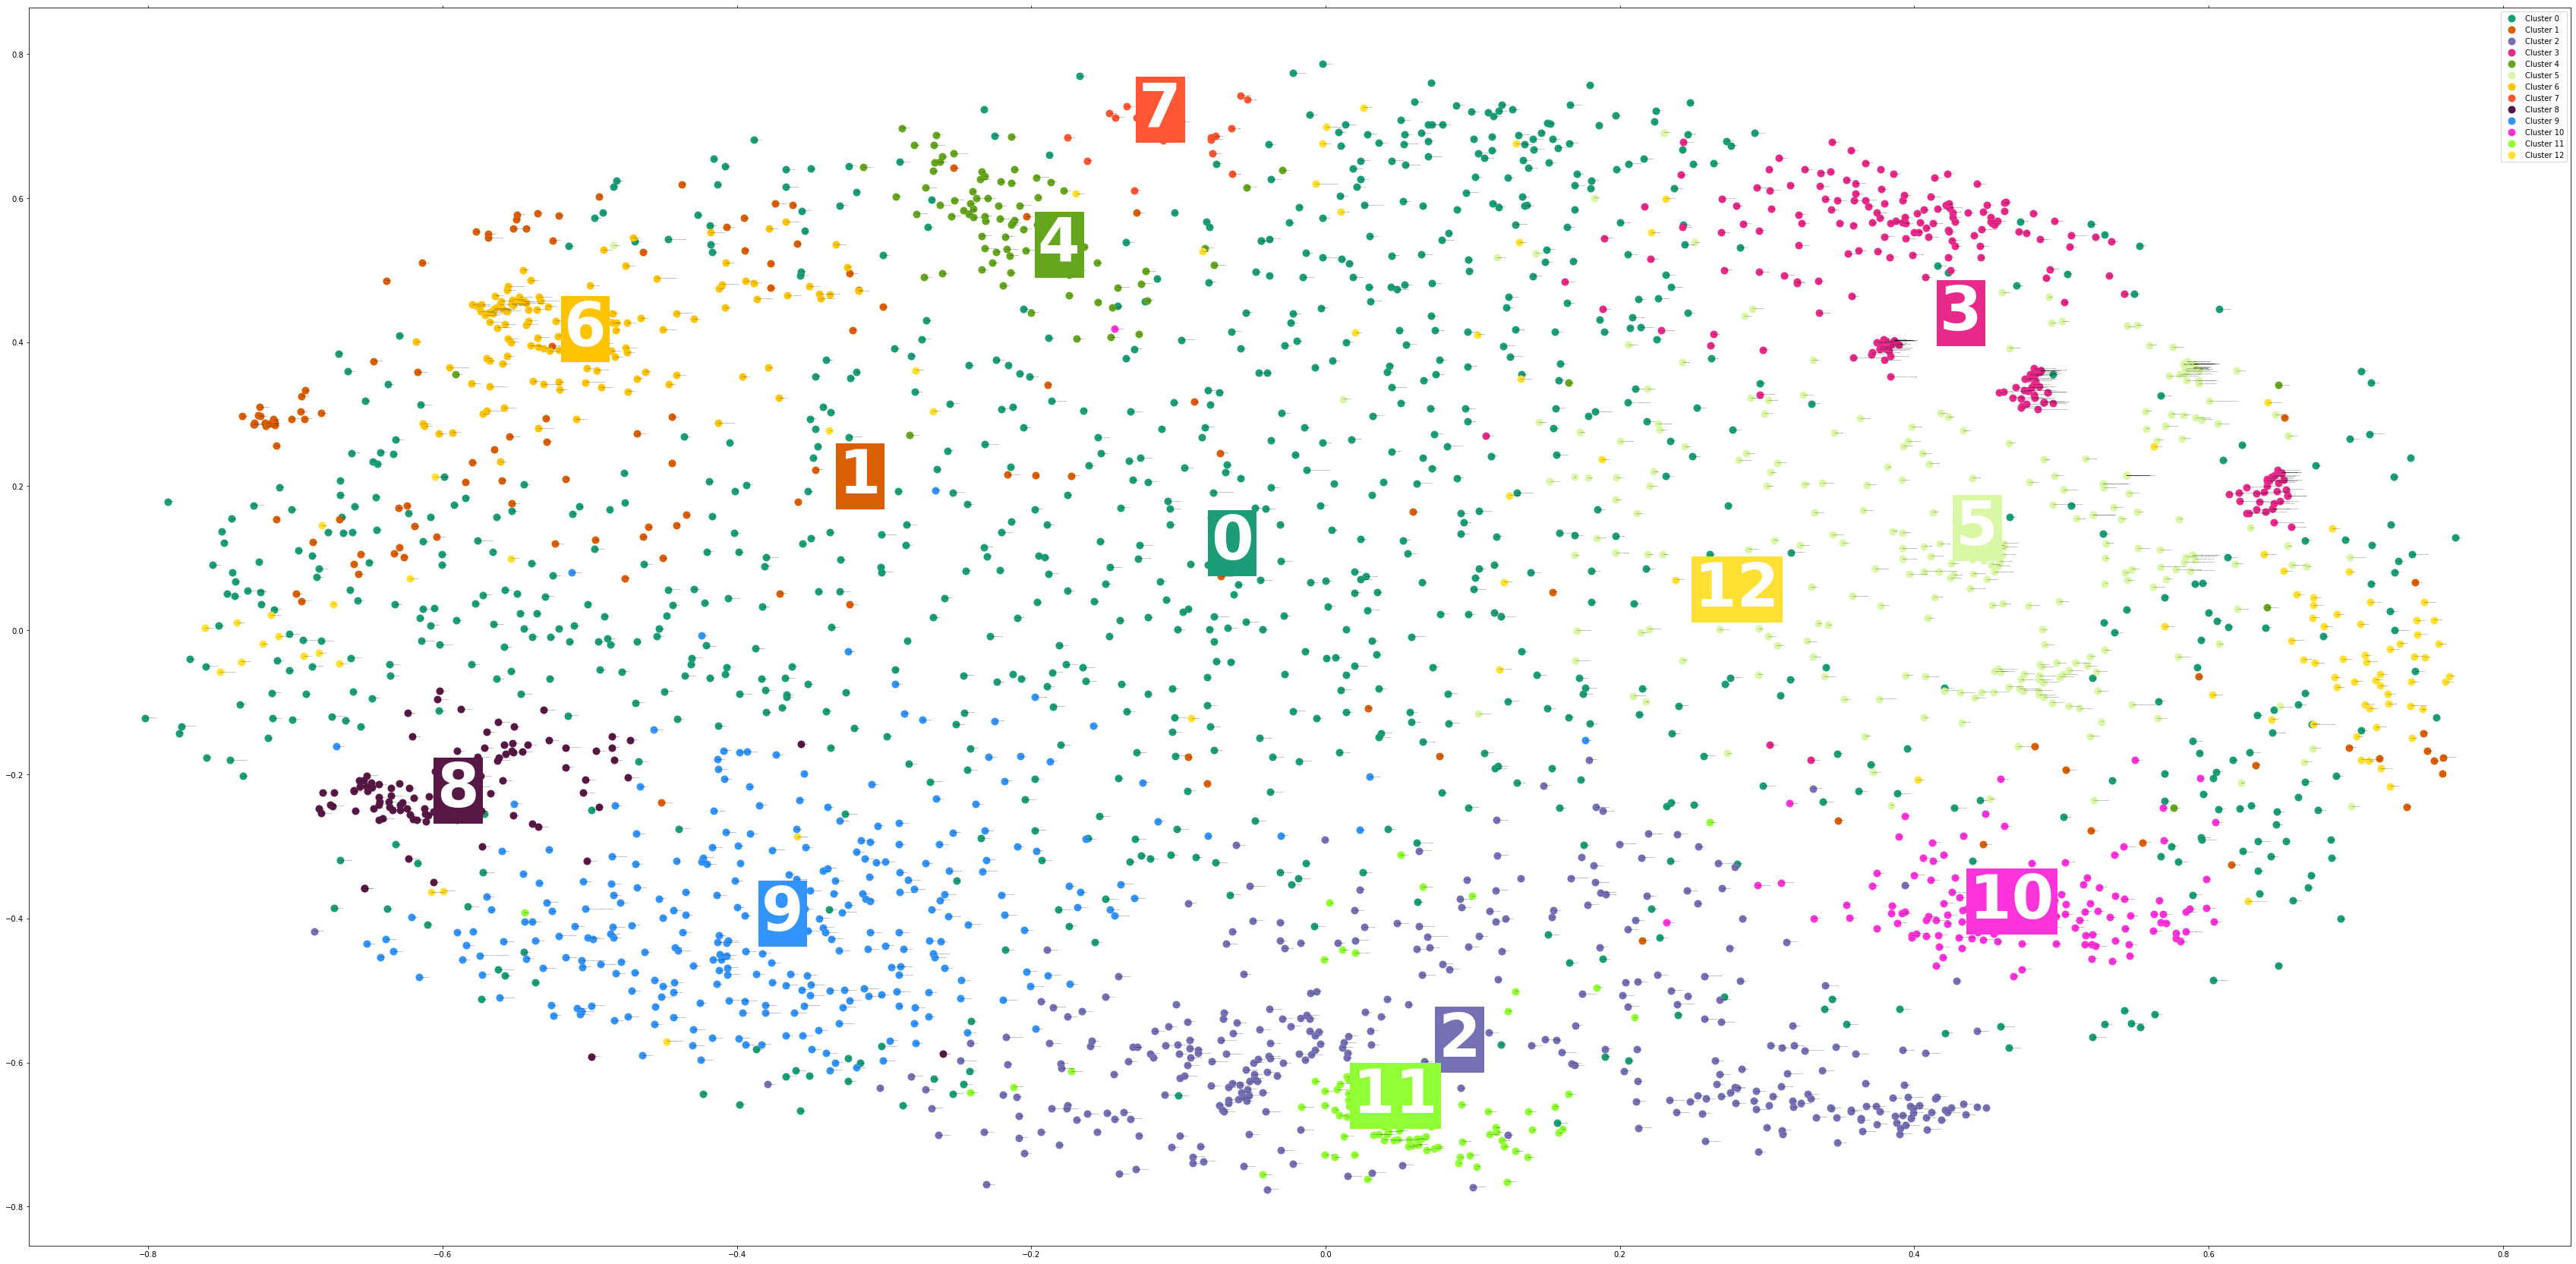

<Figure size 432x288 with 0 Axes>

In [66]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=by_occ["cluster_skill"], title=by_occ["Occ_title"])) 
#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(60, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=1)  

for i in range(len(df["label"].unique())):

    #add label
    plt.annotate(i, 
                 df.loc[df['label']==i,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=80, weight='bold',
                 color='white',
                 backgroundcolor=cluster_colors[i])

plt.show() #show the plot
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png')

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


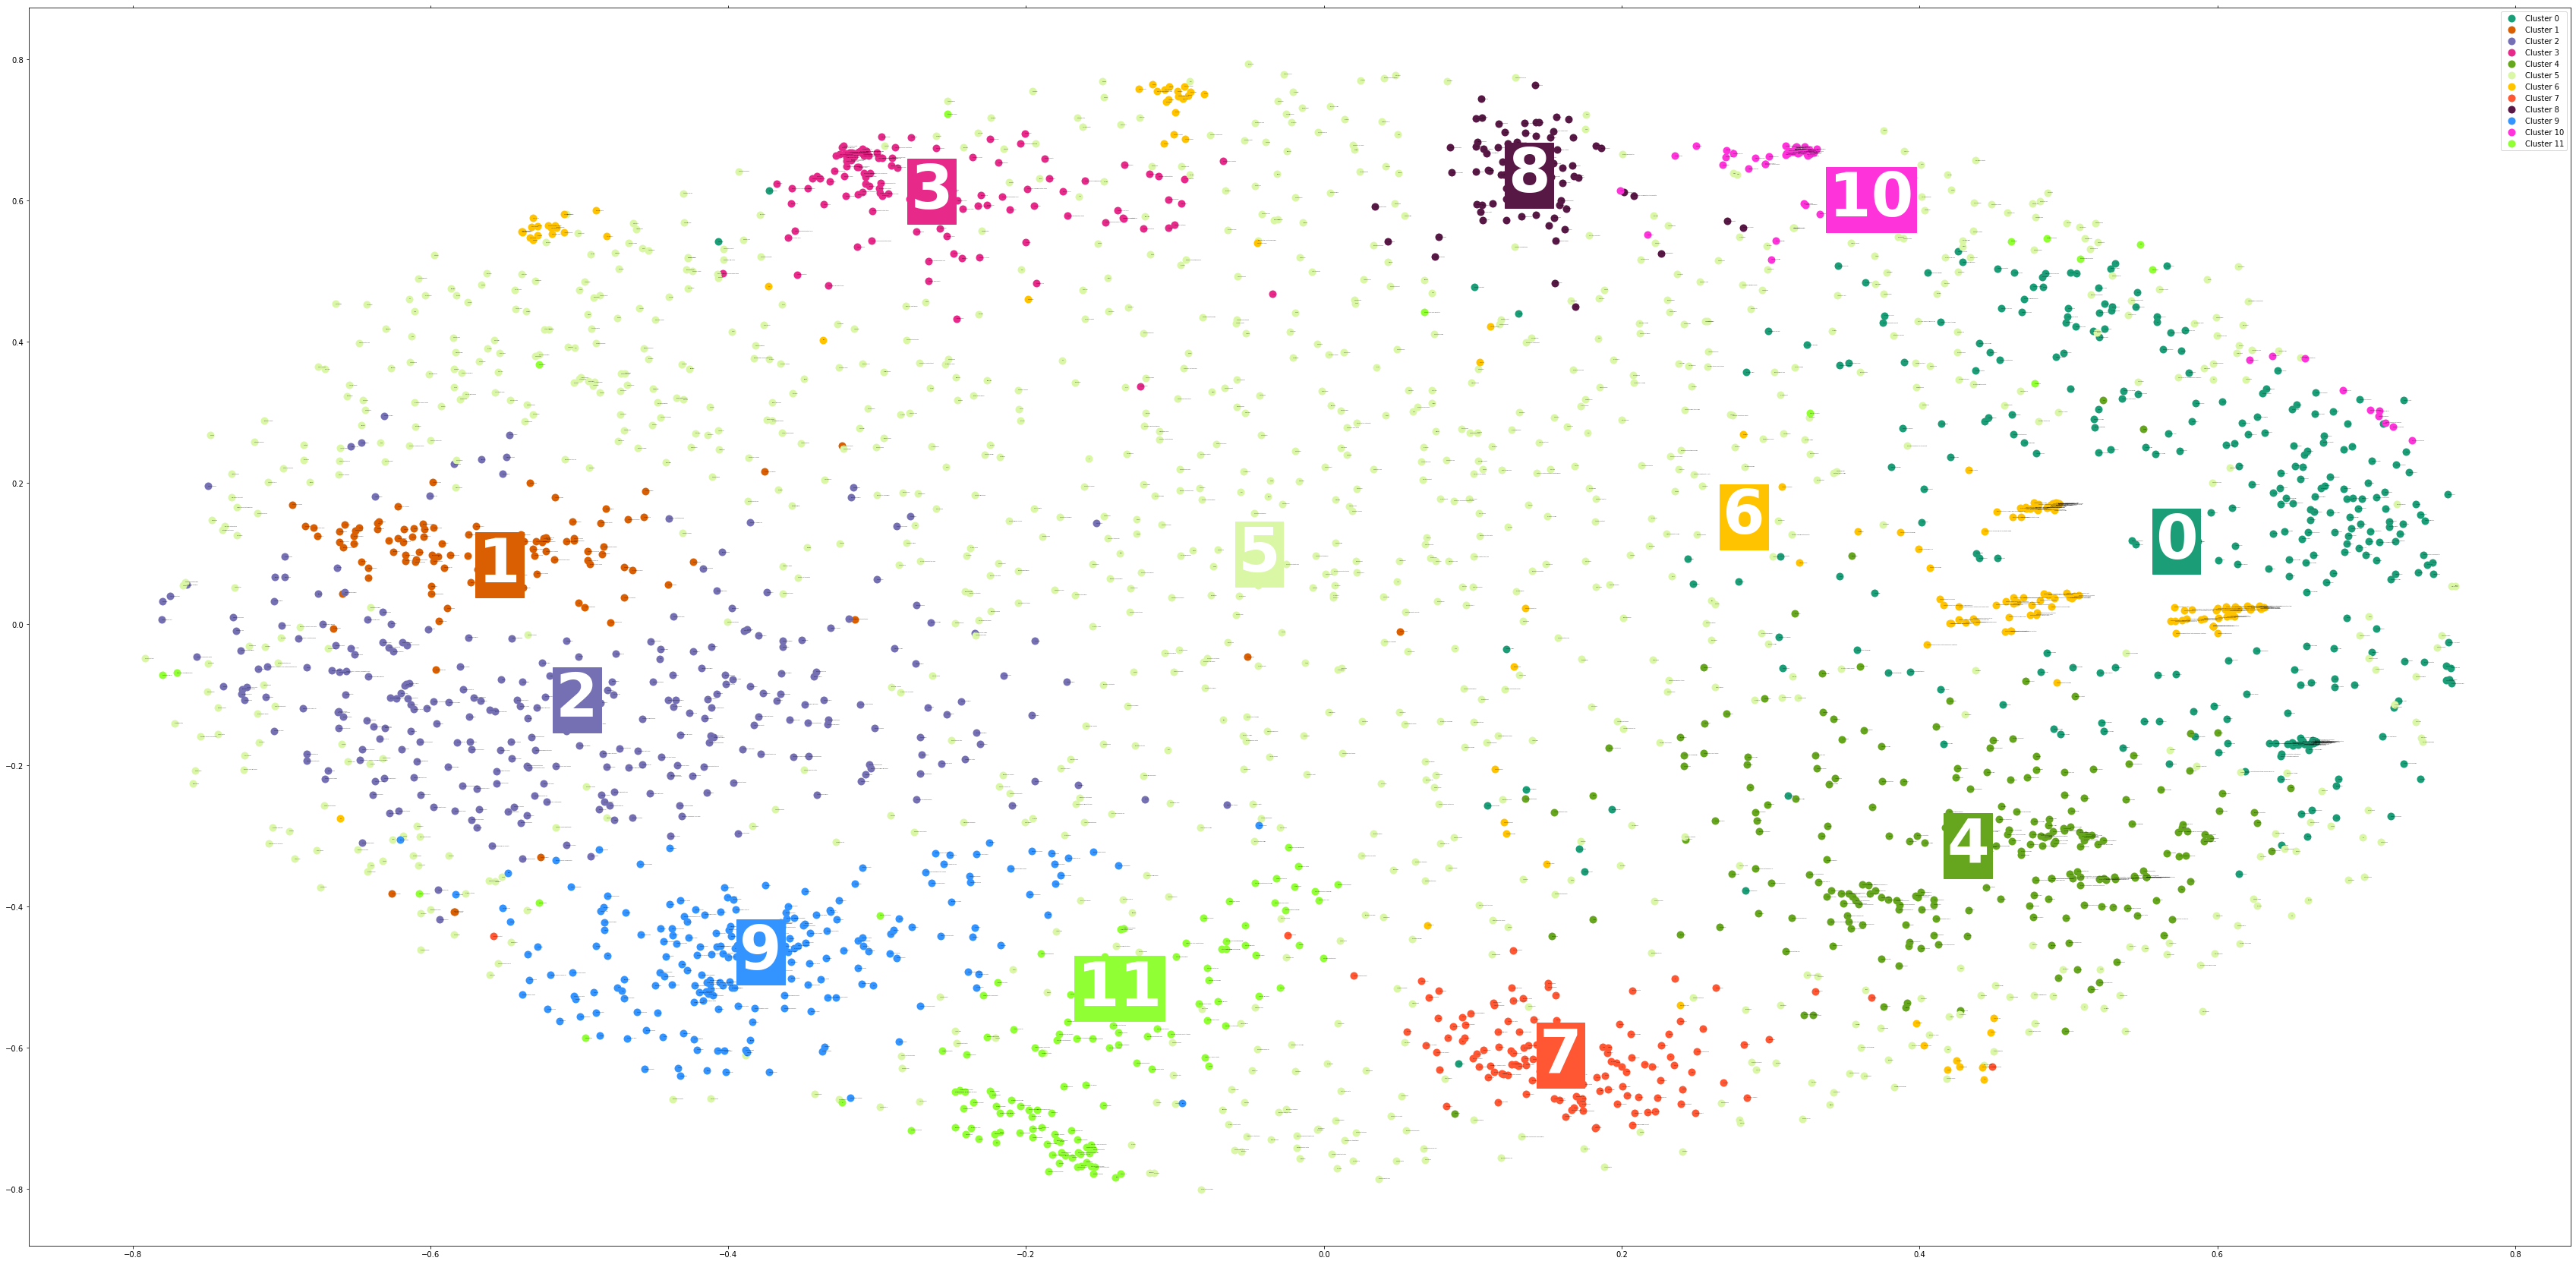

<Figure size 432x288 with 0 Axes>

In [67]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs2, y=ys2, label=by_occ["cluster_descr"], title=by_occ["Occ_title"])) 
#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(60, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=1)  

for i in range(len(df["label"].unique())):

    #add label
    plt.annotate(i, 
                 df.loc[df['label']==i,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=80, weight='bold',
                 color='white',
                 backgroundcolor=cluster_colors[i])

plt.show() #show the plot
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png')

C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


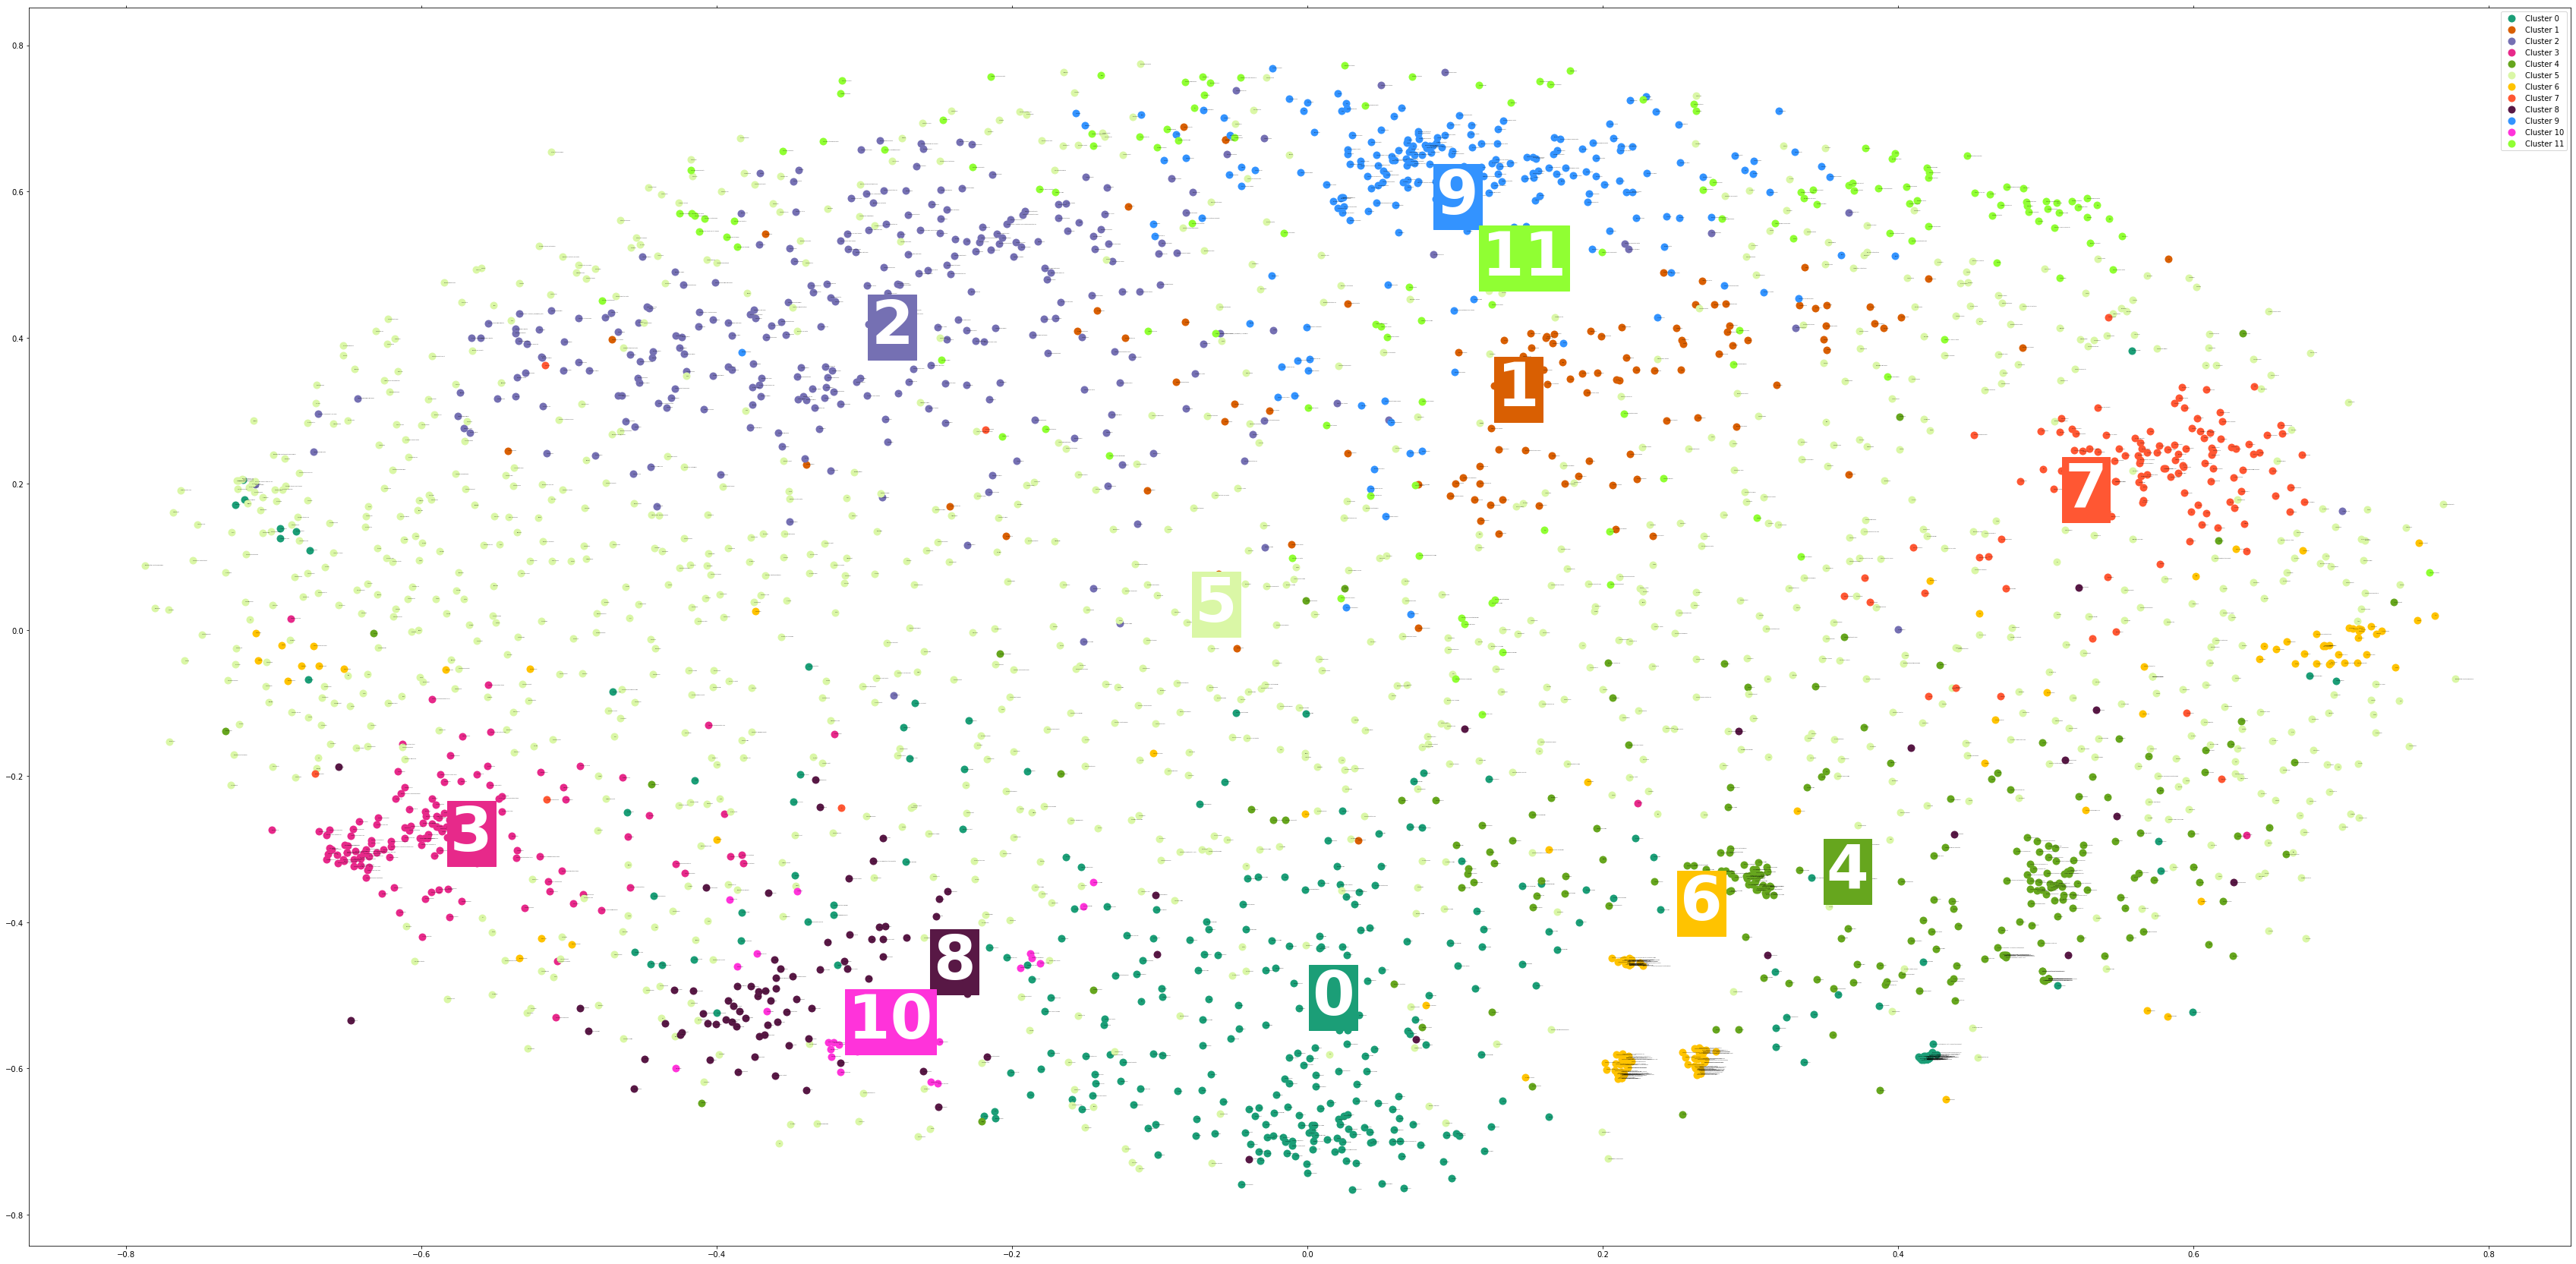

<Figure size 432x288 with 0 Axes>

In [68]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs3, y=ys3, label=by_occ['cluster_skill_descr'], title=by_occ["Occ_title"])) 
#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(60, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=1)  

for i in range(len(df["label"].unique())):

    #add label
    plt.annotate(i, 
                 df.loc[df['label']==i,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=80, weight='bold',
                 color='white',
                 backgroundcolor=cluster_colors[i])

plt.show() #show the plot
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png')